<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Centering_Data_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

- Principal Component Analysis (PCA) is widely used for dimensionality reduction and data visualization.

- This script demonstrates the difference between performing PCA with and without centering the data.

- The goal is to highlight the importance of mean-centering before applying PCA to obtain correct principal components.


# Business Objective:

- To understand the effect of centering on PCA transformations.

- To visualize principal components accurately and enhance data preprocessing techniques in machine learning applications.


# Business Constraints:

- The analysis should maintain data integrity and reproducibility.

- The visualization should be clear and informative for decision-making.

- The approach should align with best practices in machine learning and statistical modeling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Set seed for reproducibility
np.random.seed(42)

In [3]:
# Generate correlated data around (3, 5)
n_points = 50
x = 3 + np.random.normal(0, 0.5, n_points)
y = 5 + x + np.random.normal(0, 0.3, n_points)
data = np.column_stack((x, y))

In [4]:
# Compute mean
mean = np.mean(data, axis=0)
print("Mean of original data:", mean)  # Should be close to (3, 5)

Mean of original data: [2.88726305 7.89259731]


In [5]:
# PCA without centering (WRONG APPROACH)
pca_no_center = PCA()
pca_no_center.fit(data)  # PCA is applied to uncentered data

PCA()

In [6]:
# Principal components (directions)
components_no_center = pca_no_center.components_

In [7]:
print("PC1 (no centering):", components_no_center[0])
print("PC2 (no centering):", components_no_center[1])

PC1 (no centering): [0.63142513 0.77543685]
PC2 (no centering): [ 0.77543685 -0.63142513]


In [8]:
# Center the data (CORRECT APPROACH)
centered_data = data - mean

In [9]:
# PCA with centering
pca_center = PCA()
pca_center.fit(centered_data)

PCA()

In [10]:
# Principal components (directions)
components_center = pca_center.components_

In [11]:
print("PC1 (with centering):", components_center[0])
print("PC2 (with centering):", components_center[1])

PC1 (with centering): [0.63142513 0.77543685]
PC2 (with centering): [ 0.77543685 -0.63142513]


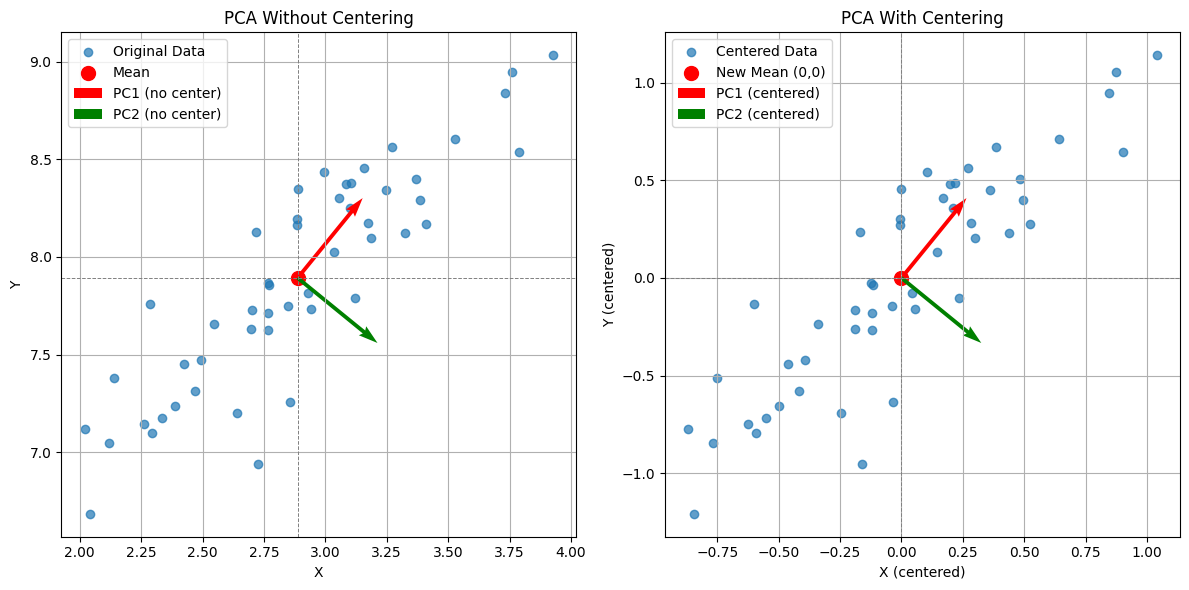

In [12]:
plt.figure(figsize=(12, 6))

# Plot 1: Original Data (No Centering)
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label="Original Data")
plt.scatter(mean[0], mean[1], c='red', s=100, label="Mean")

# Plot PC directions (no centering)
origin = mean  # For uncentered data, PCs are relative to mean
plt.quiver(*origin, *components_no_center[0], color='r', scale=5, label="PC1 (no center)")
plt.quiver(*origin, *components_no_center[1], color='g', scale=5, label="PC2 (no center)")

plt.axhline(y=mean[1], color='gray', linestyle='dashed', linewidth=0.7)
plt.axvline(x=mean[0], color='gray', linestyle='dashed', linewidth=0.7)

plt.title("PCA Without Centering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()

# Plot 2: Centered Data (Correct PCA)
plt.subplot(1, 2, 2)
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.7, label="Centered Data")
plt.scatter(0, 0, c='red', s=100, label="New Mean (0,0)")

# Plot PC directions (centered)
origin_centered = [0, 0]  # For centered data, PCs are relative to (0,0)
plt.quiver(*origin_centered, *components_center[0], color='r', scale=5, label="PC1 (centered)")
plt.quiver(*origin_centered, *components_center[1], color='g', scale=5, label="PC2 (centered)")

plt.axhline(y=0, color='gray', linestyle='dashed', linewidth=0.7)
plt.axvline(x=0, color='gray', linestyle='dashed', linewidth=0.7)

plt.title("PCA With Centering")
plt.xlabel("X (centered)")
plt.ylabel("Y (centered)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Conclusion:

- PCA without centering results in principal components that do not pass through the data origin, leading to misinterpretation.

- Correctly centering the data ensures that PCA provides meaningful transformations aligned with the variance of the dataset.

- This demonstration emphasizes the necessity of proper preprocessing for accurate dimensionality reduction and pattern recognition.

- Centering moves your data to the middle so PCA can see the true spread, not just how far it is from the center! 🚀